In [1]:
%reset -f

In [2]:
from tools import analysistools as atools
from functools import partial as partial
from ga import networkedgeneticalgorithm as nga
from db import databaseconnectionDEPRECATED as dbconn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx
from nanoparticle import CoveredNanoParticlePhenome

# DATA

In [3]:
epsIndices = range(0, 8)
epsDBs = ['db/BT-36-7-1.db','db/BT-36-7-2.db','db/BT-31-7-1.db','db/BT-32-7-1.db','db/BT-33-7-1.db','db/BT-33-7-1-ALT.db','db/BT-36-6-1.db','db/BT-36-6-2.db']
print(len(epsIndices))
print(len(epsDBs))
#epsDBs = ['db/BT-36-6-1.db','db/BT-36-6-2.db']
#epsDBs = ['db/cache/GP{}.db'.format(i) for i in epsIndices]
#epsDBs = ['db/BT-32-7-1.db']

8
8


In [4]:
dropIndProps = partial(atools.dropChildren, parentKey = 'individuals', childKeys = ['genome', 'gh'])
dropGens = partial(atools.dropParentsConditional, parentKey = 'individuals', condition = lambda ind: ind['gen'] <= 30)
dropFits = partial(atools.dropParentsConditional, parentKey = 'individuals', condition = lambda ind: ind['fitness'] >= 400.0)
dropMetrics = partial(atools.dropParents, parentKey='metrics')
dropGenealogy = partial(atools.dropParents, parentKey='genealogy')

In [5]:
dropTasks  = [dropMetrics, dropGenealogy]
cleanTasks = [atools.cleanLigands]
sortTasks = [atools.sortIndGens]

epsData = atools.load(epsDBs, dbconn, clean = cleanTasks, drop = dropTasks, sort = sortTasks)

/mnt/c/Users/manish/Documents/GitHub/optihedron/venv/local/lib/python2.7/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


8


In [6]:
len(epsData)

8

In [7]:
# def makeRandInd(numligs):
#     ind = [0]*72
#     replace = np.random.choice(len(ind), size=numligs, replace=False)
#     for i in replace:
#         ind[i] = 1
#     return ind
# datas = []
# data = {}
# data['individuals'] = []

# for noligs in range (1, 73):
#     numrands = 1000
#     print('generating num ligands{}'.format(noligs))
#     for i in range(0, numrands):
#         entry = {}
#         ind = makeRandInd(noligs)
#         entry['phenome'] = CoveredNanoParticlePhenome(ind,1,0,10,10)
#         data['individuals'].append(entry)
#     data = atools.cleanLigands(data)
#     data['individuals'].sort(key=lambda x:len(x['phenome'].particle.ligands))

# datas.append(data)
# epsData = datas

# PLOTS

In [8]:
epsLabel = 'ligand strength'
purpleMap = sns.cubehelix_palette(as_cmap=True)
BlueRedMap = 'RdBu_r'

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 20.0)

In [9]:
reload(atools)
from tools import analysistools as atools

In [24]:
# # vs. gen
# sortedData = []
# for epsDatum in epsData:
#     sortedData.append(atools.sortIndGens(epsDatum))
# epsData = sortedData
# plotScan = partial(atools.plotScanGen, scanData=epsData, scanLabel=epsLabel, scanIndices=epsIndices, indexOffset=epsIndices[0], annotate=True, dump=True, fmt='.2f')

In [25]:
def fitRead(fits):
    tFits = []
    for fit in fits:
        if fit >= 400.0:
            penalty = (fit-400.0)
            bt = int(25000.0*(1.0 - (penalty/600.0)))
            tFits.append(bt)
        else:
            tFits.append(-1)
    return tFits

In [26]:
# def affRead(fits):
#     tFits = []
#     for fit in fits:
#         if fit >= 400.0:
#             penalty = (fit-400.0)
#             bt = int((15.0*72.0) * (1.0 - (penalty/600.0)))
#             #print(bt)
#             #raise TypeError
#             tFits.append(bt)
#         else:
#             tFits.append(-1)
#     return tFits

In [27]:
# vs. fitness
sortedData = []
for epsDatum in epsData:
    sortedData.append(atools.sortIndFits(epsDatum))
epsData = sortedData
#plotScan = partial(atools.plotScanCustom, scanData=epsData, scanLabel=epsLabel, scanIndices=epsIndices, indexOffset=epsIndices[0], interestKey=lambda ind: float(ind['fitness']), interestKeyLabel='fitness (total affinity)',tickerRange=25,tickerBlockSize=5,tickerBlockOffset=770,annotate=True)
#plotScan = partial(atools.plotScanCustom, scanData=epsData, scanLabel=epsLabel, scanIndices=epsIndices, indexOffset=epsIndices[0], interestKey=lambda ind: float(ind['fitness']), interestKeyLabel='fitness (total affinity)',tickerRange=28,tickerBlockSize=5,tickerBlockOffset=760,annotate=True, dump=True, fitTranslate=affRead)
plotScan = partial(atools.plotScanCustom, scanData=epsData, scanLabel='index', scanIndices=epsIndices, indexOffset=epsIndices[0], interestKey=lambda ind: float(ind['fitness']), interestKeyLabel='budding time',tickerRange=68,tickerBlockSize=5,tickerBlockOffset=450,annotate=True, dump=True)
#plotScan = partial(atools.plotScanCustom, scanData=epsData, scanLabel='index', scanIndices=epsIndices, indexOffset=epsIndices[0], interestKey=lambda ind: float(ind['fitness']), interestKeyLabel='budding time',tickerRange=30,tickerBlockSize=25,tickerBlockOffset=100,annotate=True, dump=True)

In [28]:
# epsIndices = [0]

In [29]:
# # vs. no. ligands
# sortedData = []
# for epsDatum in epsData:
#     sortedData.append(atools.sortIndLigandCount(epsDatum))
# epsData = sortedData
# plotScan = partial(atools.plotScanCustom, scanData=epsData, scanLabel=epsLabel, scanIndices=epsIndices, indexOffset=epsIndices[0], interestKey=lambda ind: float(len(ind['phenome'].particle.ligands)), interestKeyLabel='number of ligands',tickerRange=36,tickerBlockSize=2,tickerBlockOffset=2,annotate=True,dump=True)

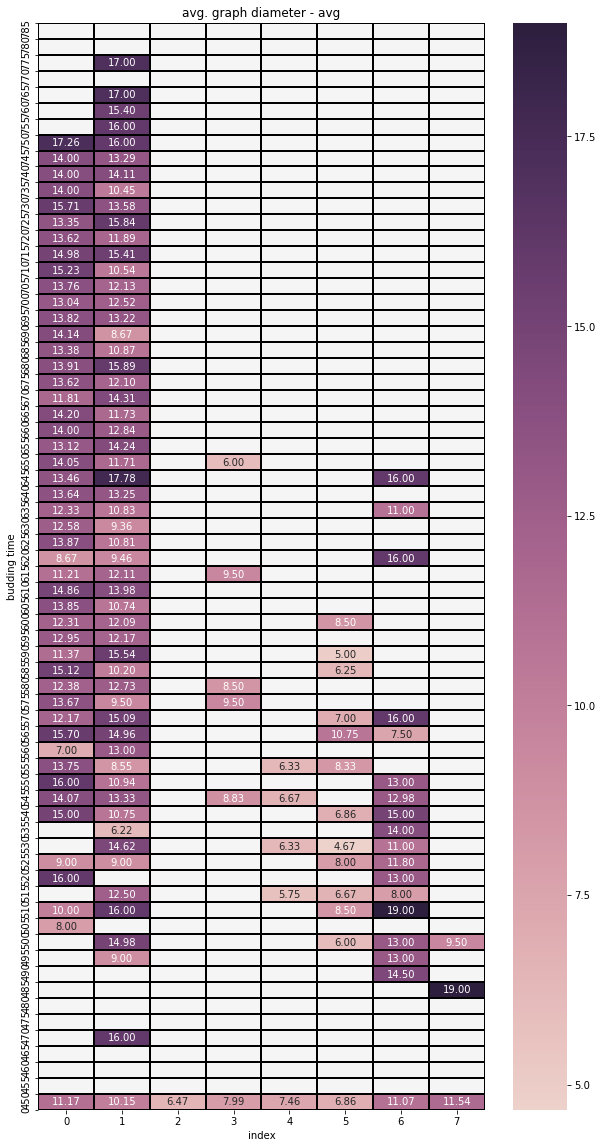

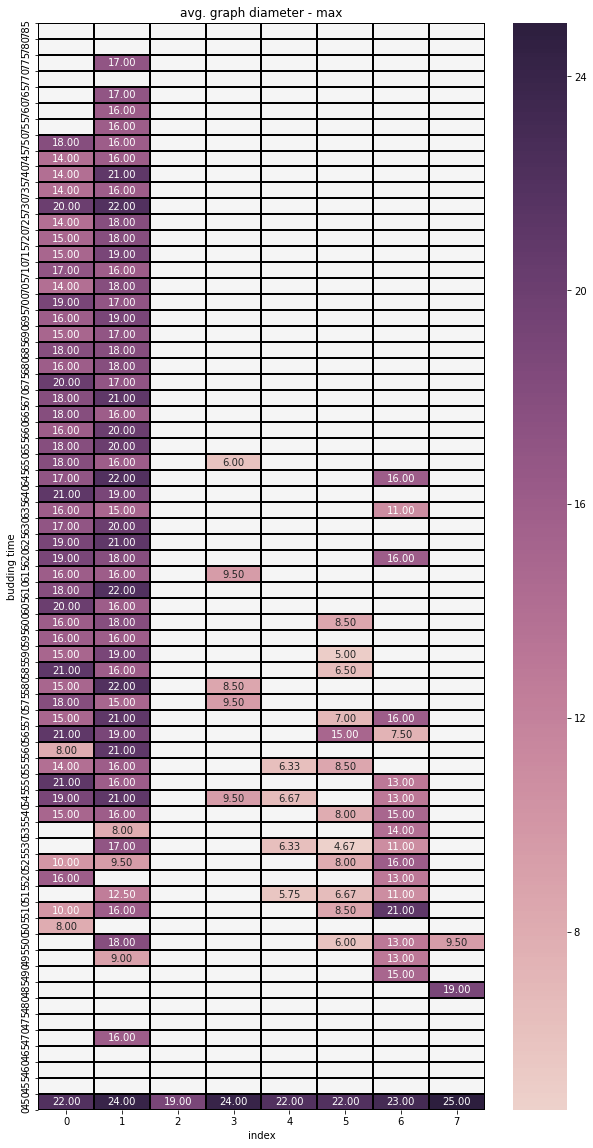

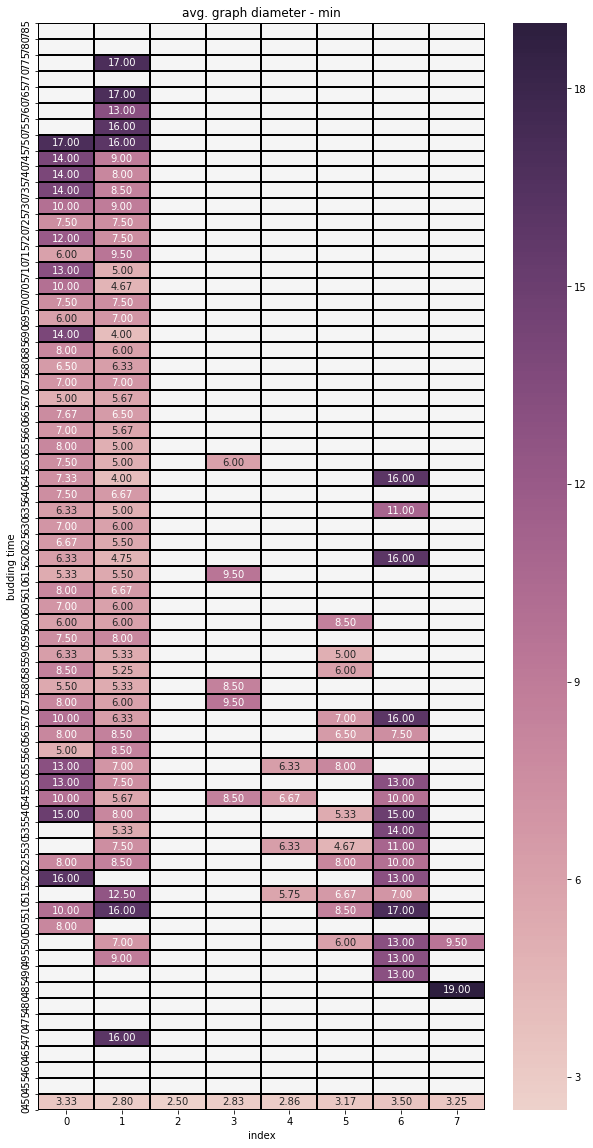

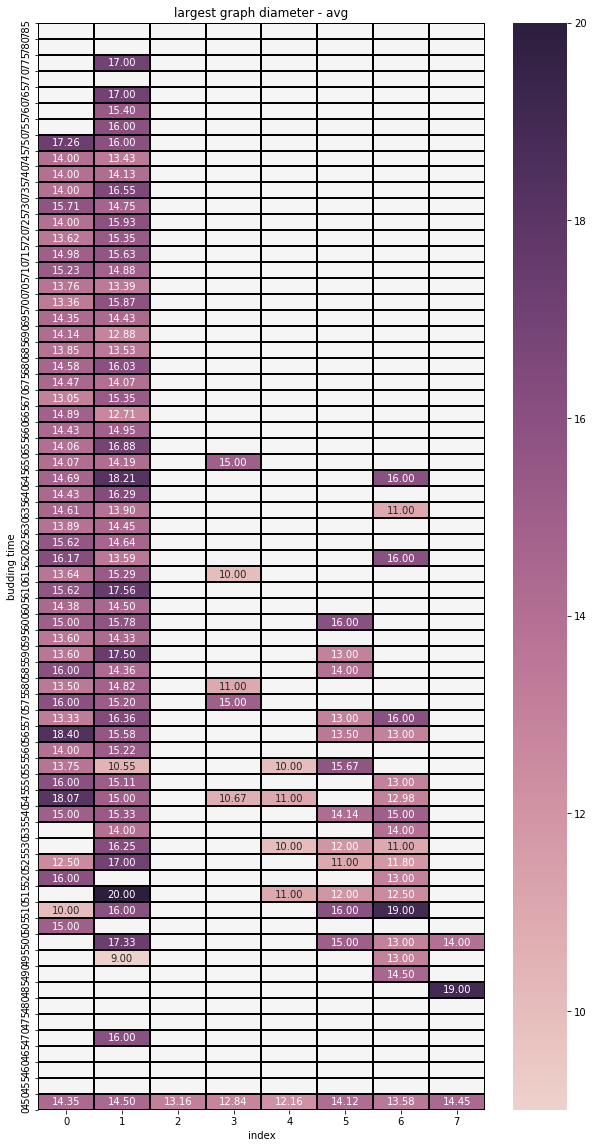

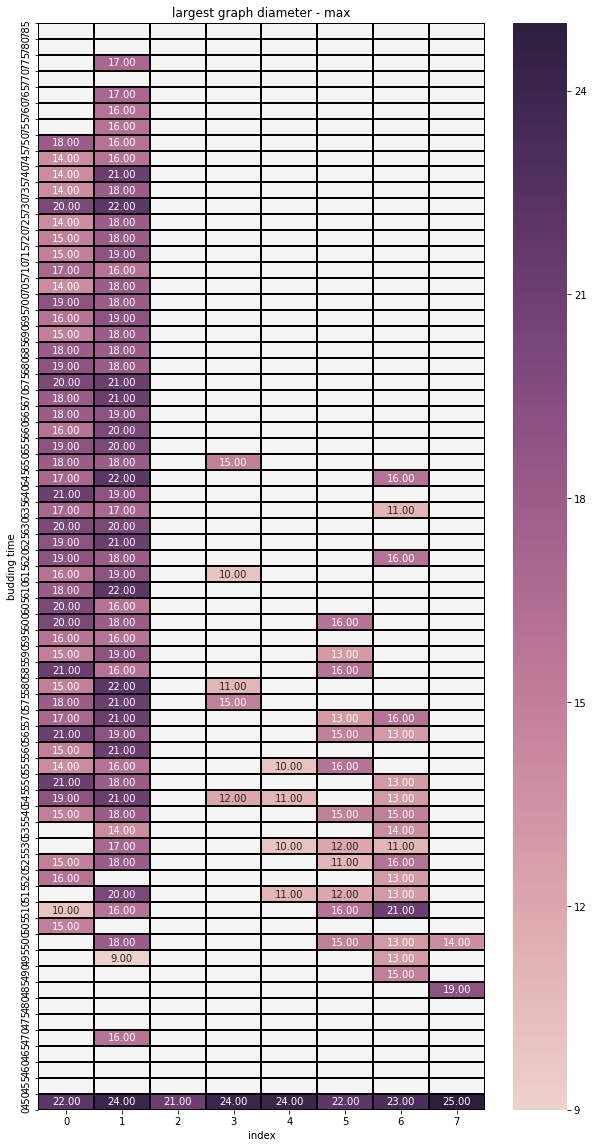

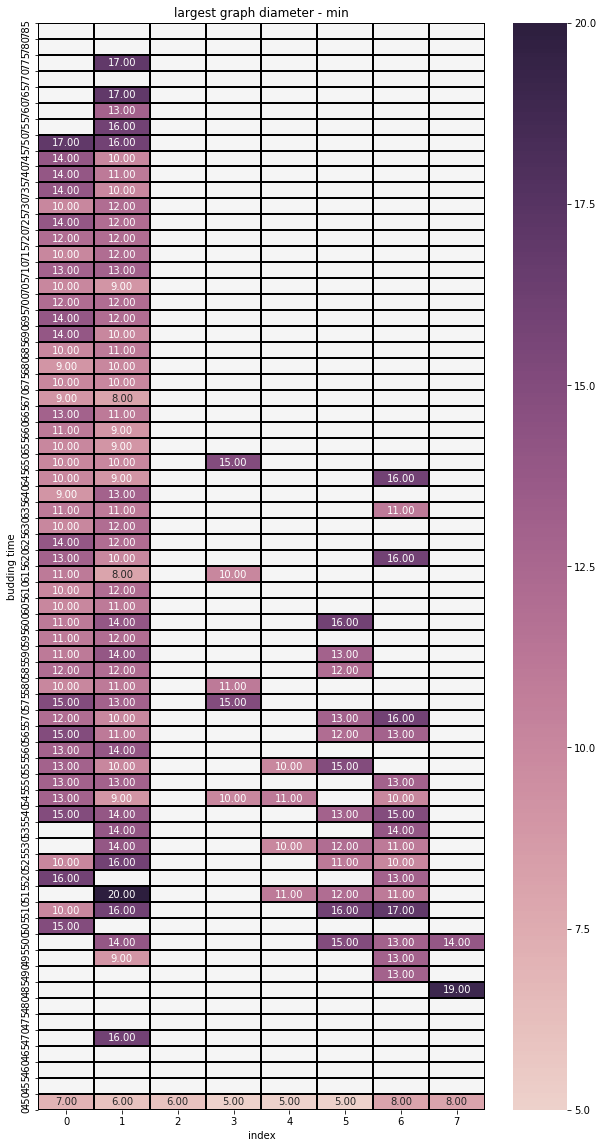

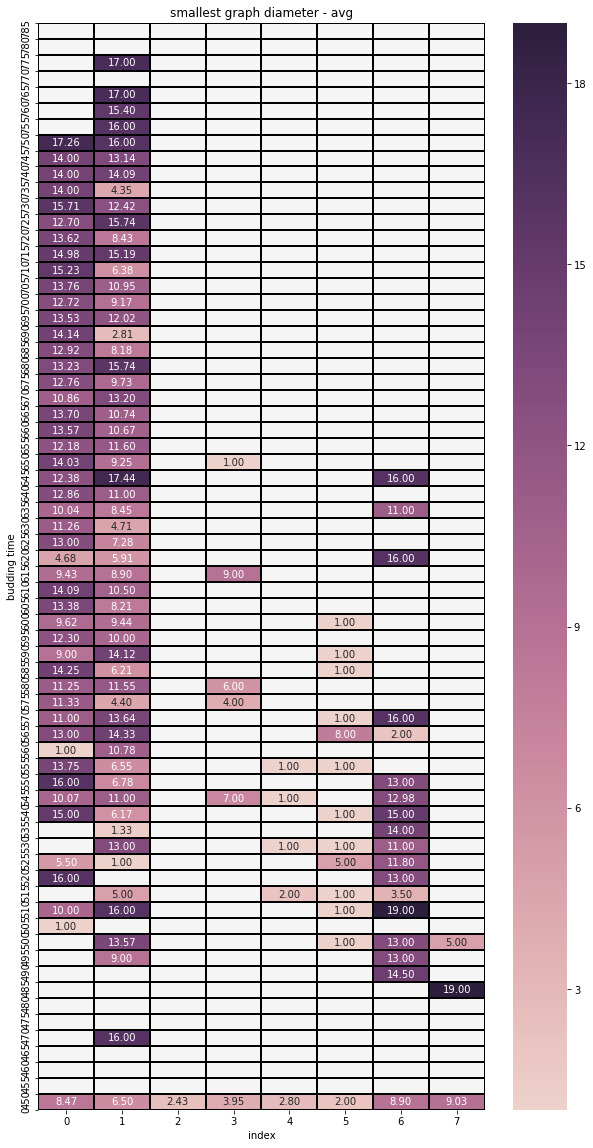

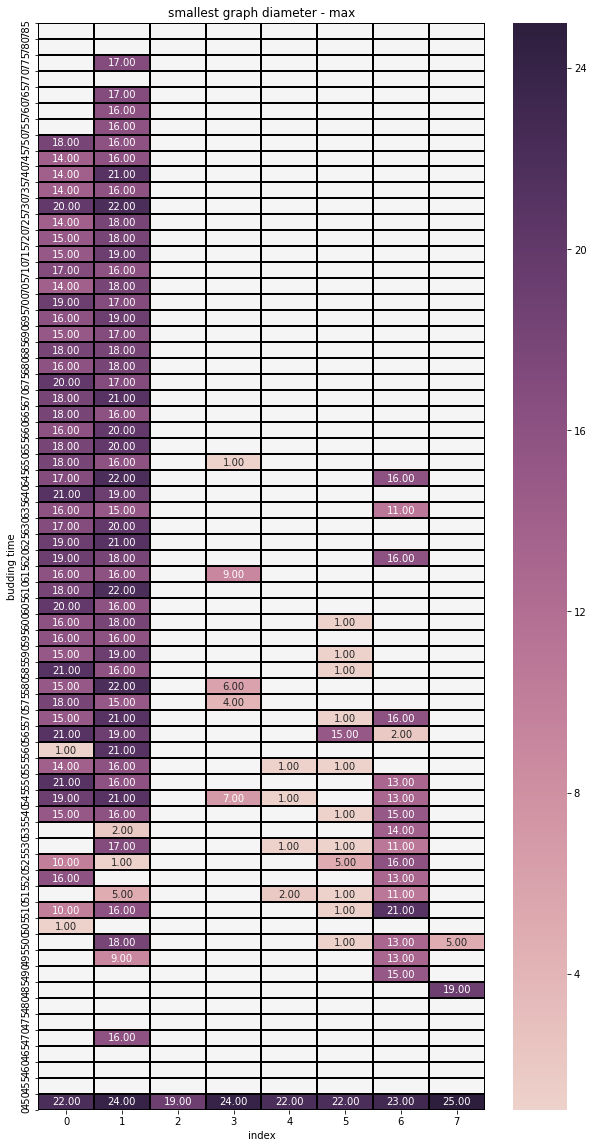

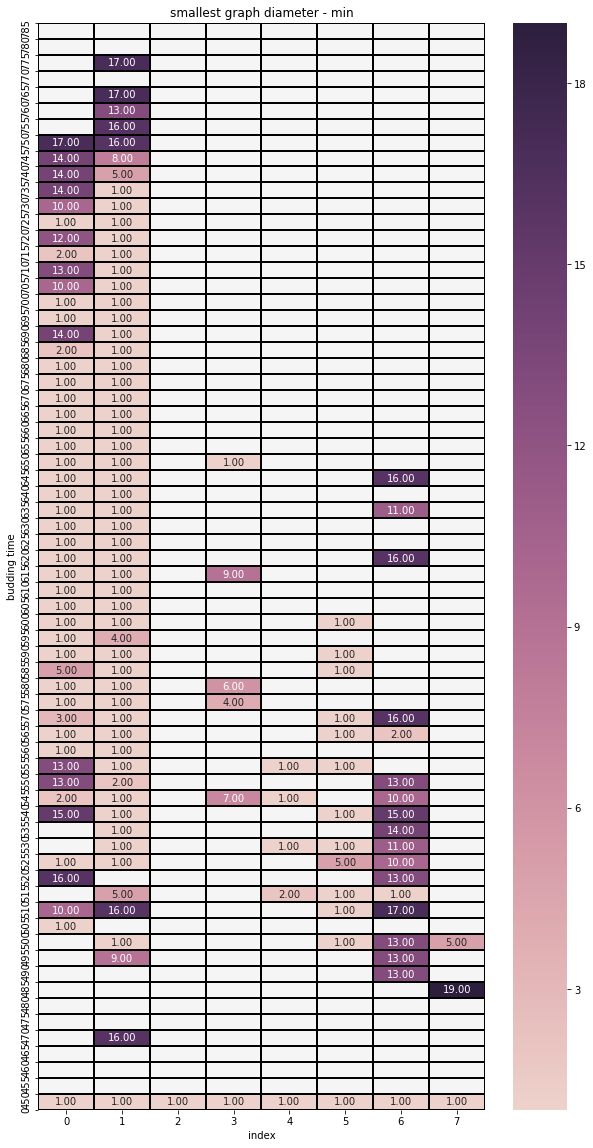

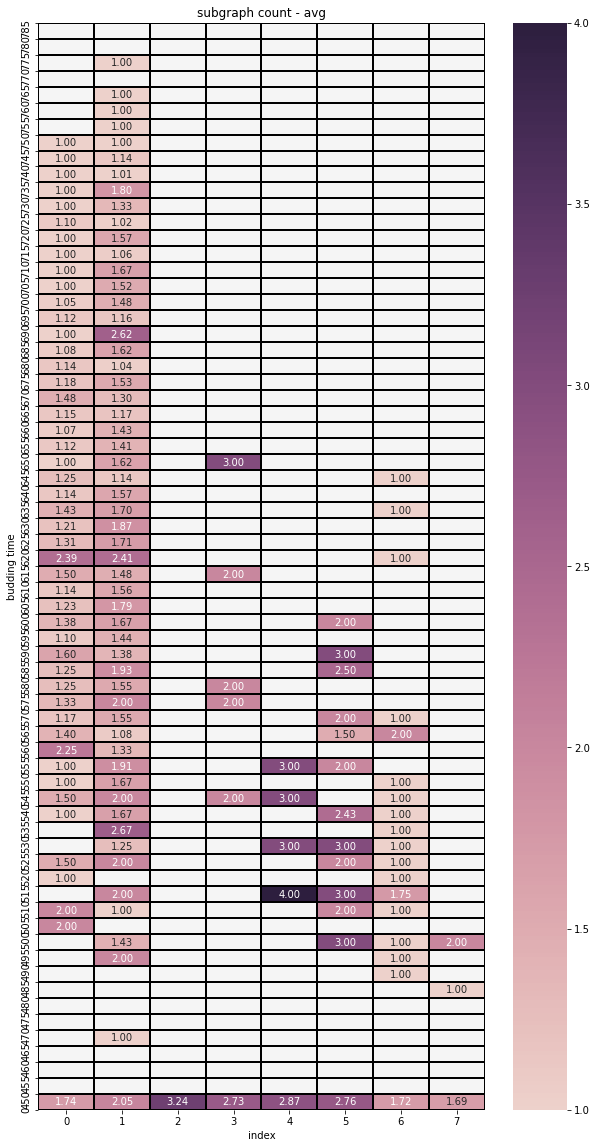

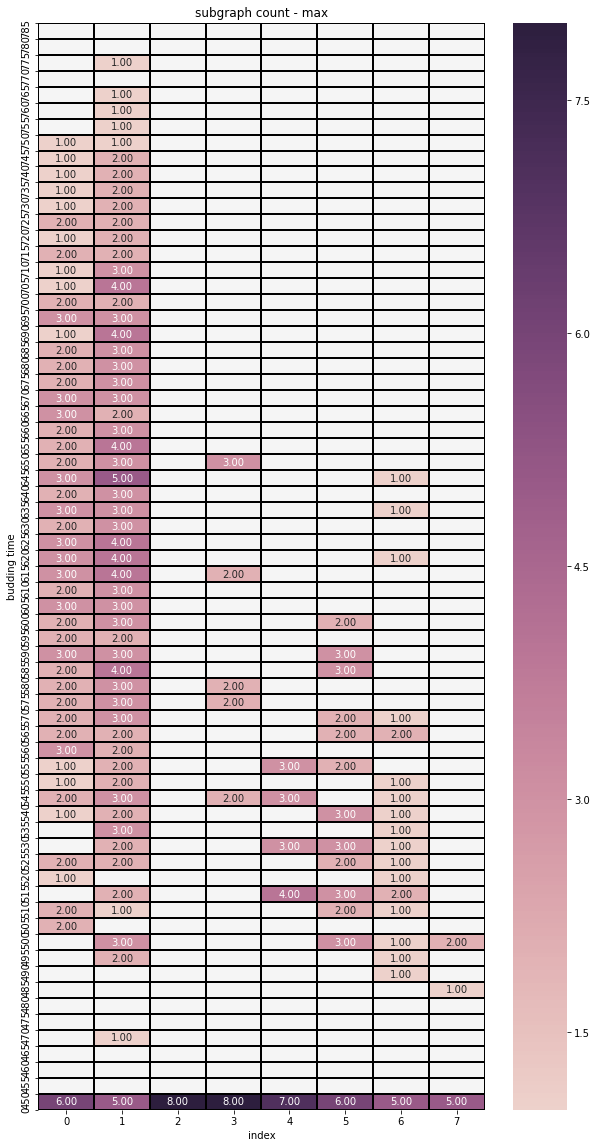

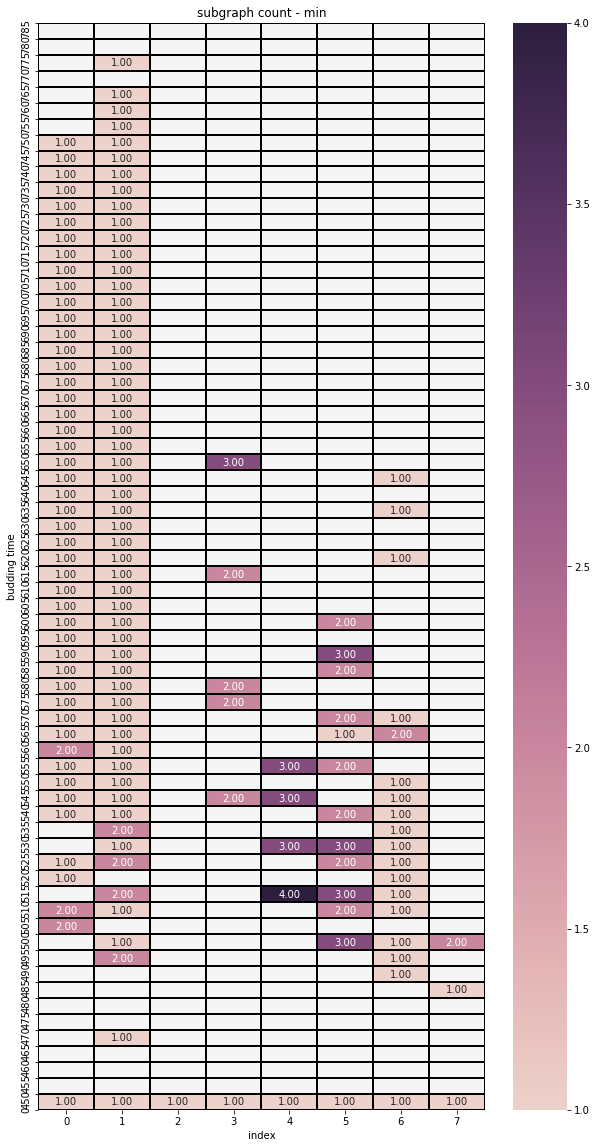

In [30]:
#plotScan(interest=atools.characterScore, aggregateMode='AVG', plotName='character score - avg', cmap=BlueRedMap, vmin=-1, vmax=1)
#plotScan(interest=atools.characterScore, aggregateMode='MAX', plotName='character score - max', cmap=BlueRedMap, vmin=-1, vmax=1)
#plotScan(interest=atools.characterScore, aggregateMode='MIN', plotName='character score - min', cmap=BlueRedMap, vmin=-1, vmax=1)

#plotScan(interest=atools.lineyABS, aggregateMode='AVG', plotName='number of liney ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.lineyABS, aggregateMode='MAX', plotName='number of liney ligands - max', cmap=purpleMap)
#plotScan(interest=atools.lineyABS, aggregateMode='MIN', plotName='number of liney ligands - min', cmap=purpleMap)

#plotScan(interest=atools.lineyREL, aggregateMode='AVG', plotName='fraction of liney ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.lineyREL, aggregateMode='MAX', plotName='fraction of liney ligands - max', cmap=purpleMap)
#plotScan(interest=atools.lineyREL, aggregateMode='MIN', plotName='fraction of liney ligands - min', cmap=purpleMap)

#plotScan(interest=atools.spottyABS, aggregateMode='AVG', plotName='number of spotty ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.spottyABS, aggregateMode='MAX', plotName='number of spotty ligands - max', cmap=purpleMap)
#plotScan(interest=atools.spottyABS, aggregateMode='MIN', plotName='number of spotty ligands - min', cmap=purpleMap)

#plotScan(interest=atools.spottyREL, aggregateMode='AVG', plotName='fraction of spotty ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.spottyREL, aggregateMode='MAX', plotName='fraction of spotty ligands - max', cmap=purpleMap)
#plotScan(interest=atools.spottyREL, aggregateMode='MIN', plotName='fraction of spotty ligands - min', cmap=purpleMap)

#plotScan(interest=atools.patchyABS, aggregateMode='AVG', plotName='number of patchy ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.patchyABS, aggregateMode='MAX', plotName='number of patchy ligands - max', cmap=purpleMap)
#plotScan(interest=atools.patchyABS, aggregateMode='MIN', plotName='number of patchy ligands - min', cmap=purpleMap)

#plotScan(interest=atools.patchyREL, aggregateMode='AVG', plotName='fraction of patchy ligands - avg', cmap=purpleMap)
#plotScan(interest=atools.patchyREL, aggregateMode='MAX', plotName='fraction of patchy ligands - max', cmap=purpleMap)
#plotScan(interest=atools.patchyREL, aggregateMode='MIN', plotName='fraction of patchy ligands - min', cmap=purpleMap)

#plotScan(interest=lambda ind: float(ind['fitness']), aggregateMode='AVG', plotName='fitness - avg', fmt='.2f', cmap=purpleMap)
#plotScan(interest=lambda ind: float(ind['fitness']), aggregateMode='MAX', plotName='fitness - max', fmt='.2f', cmap=purpleMap)
#plotScan(interest=lambda ind: float(ind['fitness']), aggregateMode='MIN', plotName='fitness - min', fmt='.2f', cmap=purpleMap)

#plotScan(interest=lambda ind: float(len(ind['phenome'].particle.ligands)), aggregateMode='AVG', plotName='number of ligands - avg', cmap=purpleMap)
#plotScan(interest=lambda ind: float(len(ind['phenome'].particle.ligands)), aggregateMode='MAX', plotName='number of ligands - max', cmap=purpleMap)
#plotScan(interest=lambda ind: float(len(ind['phenome'].particle.ligands)), aggregateMode='MIN', plotName='number of ligands - min', cmap=purpleMap)

#plotScan(interest=lambda ind: float(np.sum([lig.eps for lig in ind['phenome'].particle.ligands])), aggregateMode='AVG', plotName='total ligand affinity - avg', fmt='.2f', cmap=purpleMap)
#plotScan(interest=lambda ind: float(np.sum([lig.eps for lig in ind['phenome'].particle.ligands])), aggregateMode='MAX', plotName='total ligand affinity - max', fmt='.2f', cmap=purpleMap)
#plotScan(interest=lambda ind: float(np.sum([lig.eps for lig in ind['phenome'].particle.ligands])), aggregateMode='MIN', plotName='total ligand affinity - min', fmt='.2f', cmap=purpleMap)

#plotScan(interest=atools.NNCountAVG, aggregateMode='AVG', plotName='average number of NNs - avg', cmap=purpleMap)
#plotScan(interest=atools.NNCountAVG, aggregateMode='MAX', plotName='average number of NNs - max', cmap=purpleMap)
#plotScan(interest=atools.NNCountAVG, aggregateMode='MIN', plotName='average number of NNs - min', cmap=purpleMap)

#plotScan(interest=atools.lineyChainCount, aggregateMode='AVG', plotName='number of liney chains - avg', cmap=purpleMap)
#plotScan(interest=atools.lineyChainCount, aggregateMode='MAX', plotName='number of liney chains - max', cmap=purpleMap)
#plotScan(interest=atools.lineyChainCount, aggregateMode='MIN', plotName='number of liney chains - min', cmap=purpleMap)

##plotScan(interest=atools.lineyChainSizeAVG, aggregateMode='AVG', plotName='average size of liney chains - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeAVG, aggregateMode='MAX', plotName='average size of liney chains - max', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeAVG, aggregateMode='MIN', plotName='average size of liney chains - min', cmap=purpleMap)

##plotScan(interest=atools.lineyChainSizeMAX, aggregateMode='AVG', plotName='size of largest liney chain - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeMAX, aggregateMode='MAX', plotName='size of largest liney chain - max', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeMAX, aggregateMode='MIN', plotName='size of largest liney chain - min', cmap=purpleMap)

##plotScan(interest=atools.lineyChainSizeMIN, aggregateMode='AVG', plotName='size of smallest liney chain - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeMIN, aggregateMode='MAX', plotName='size of smallest liney chain - max', cmap=purpleMap)
##plotScan(interest=atools.lineyChainSizeMIN, aggregateMode='MIN', plotName='size of smallest liney chain - min', cmap=purpleMap)

#plotScan(interest=atools.lineyLineCount, aggregateMode='AVG', plotName='number of liney lines - avg', cmap=purpleMap)
#plotScan(interest=atools.lineyLineCount, aggregateMode='MAX', plotName='number of liney lines - max', cmap=purpleMap)
#plotScan(interest=atools.lineyLineCount, aggregateMode='MIN', plotName='number of liney lines - min', cmap=purpleMap)

##plotScan(interest=atools.lineyLineSizeAVG, aggregateMode='AVG', plotName='average size of liney lines - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeAVG, aggregateMode='MAX', plotName='average size of liney lines - max', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeAVG, aggregateMode='MIN', plotName='average size of liney lines - min', cmap=purpleMap)

##plotScan(interest=atools.lineyLineSizeMAX, aggregateMode='AVG', plotName='size of largest liney lines - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeMAX, aggregateMode='MAX', plotName='size of largest liney lines - max', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeMAX, aggregateMode='MIN', plotName='size of largest liney lines - min', cmap=purpleMap)

##plotScan(interest=atools.lineyLineSizeMIN, aggregateMode='AVG', plotName='size of smallest liney lines - avg', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeMIN, aggregateMode='MAX', plotName='size of smallest liney lines - max', cmap=purpleMap)
##plotScan(interest=atools.lineyLineSizeMIN, aggregateMode='MIN', plotName='size of smallest liney lines - min', cmap=purpleMap)

##plotScan(interest=atools.genomeConvergence, aggregateMode='POP', plotName='genetic convergence', cmap=purpleMap)
##plotScan(interest=atools.genomeCount, aggregateMode='POP', plotName='no. unique genomes', cmap=purpleMap, fmt='.0f')
##plotScan(interest=len, aggregateMode='POP', plotName='no. individuals', cmap=purpleMap, fmt='.0f')

plotScan(interest=atools.graphDiametersAVG, aggregateMode='AVG', plotName='avg. graph diameter - avg', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersAVG, aggregateMode='MAX', plotName='avg. graph diameter - max', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersAVG, aggregateMode='MIN', plotName='avg. graph diameter - min', cmap=purpleMap, fmt='.2f')

plotScan(interest=atools.graphDiametersMAX, aggregateMode='AVG', plotName='largest graph diameter - avg', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersMAX, aggregateMode='MAX', plotName='largest graph diameter - max', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersMAX, aggregateMode='MIN', plotName='largest graph diameter - min', cmap=purpleMap, fmt='.2f')

plotScan(interest=atools.graphDiametersMIN, aggregateMode='AVG', plotName='smallest graph diameter - avg', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersMIN, aggregateMode='MAX', plotName='smallest graph diameter - max', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersMIN, aggregateMode='MIN', plotName='smallest graph diameter - min', cmap=purpleMap, fmt='.2f')

plotScan(interest=atools.graphDiametersCount, aggregateMode='AVG', plotName='subgraph count - avg', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersCount, aggregateMode='MAX', plotName='subgraph count - max', cmap=purpleMap, fmt='.2f')
plotScan(interest=atools.graphDiametersCount, aggregateMode='MIN', plotName='subgraph count - min', cmap=purpleMap, fmt='.2f')

In [ ]:
2

In [ ]:
# %reset-f